# CoronoVirus
* Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus. Most people who fall sick with COVID-19 will experience mild to moderate symptoms and recover without special treatment. 
* Coronaviruses are common in different animals. Rarely, an animal coronavirus can infect humans.
* There are many different kinds of coronaviruses. Some of them can cause colds or other mild respiratory (nose, throat, lung) illnesses.
* Other coronaviruses can cause more serious diseases, including severe acute respiratory syndrome (SARS) and Middle East respiratory syndrome (MERS).
* Coronaviruses are named for their appearance: Under the microscope, the viruses look like they are covered with pointed structures that surround them like a corona, or crown.

<img src="https://www.heritagevalley.org/media/W1siZiIsIjIwMjAvMDMvMTMvNm5mb2FkcHpid19Db3JvbmF2aXJ1c19IZXJvLmpwZyJdXQ/Coronavirus-Hero.jpg" height = "300" width ="1000">

### HOW IT SPREADS
* The virus that causes COVID-19 is mainly transmitted through droplets generated when an infected person coughs, sneezes, or exhales. These droplets are too heavy to hang in the air, and quickly fall on floors or surfaces.  You can be infected by breathing in the virus if you are within close proximity of someone who has COVID-19, or by touching a contaminated surface and then your eyes, nose or mouth.

In [30]:
## Import the Dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pycountry_convert as pc
from mpl_toolkits.basemap import Basemap

import warnings
warnings.filterwarnings("ignore")

from keras.models import Sequential
from keras import layers
from keras import optimizers
from sklearn.preprocessing import MinMaxScaler

In [2]:
## Read the data from url
globaly_df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv", )

In [3]:
## Dimensions and Head of the data set
print("Dimensions of Data set : ", globaly_df.shape)
globaly_df.head()

Dimensions of Data set :  (188, 14)


,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3
0,Australia,2020-05-18 04:32:18,-25.0000,133.0000,7054.0,99.0,6394.0,561.0,27.706532,NaN,NaN,1.403459,36,AUS
1,Austria,2020-05-18 04:32:18,47.5162,14.5501,16242.0,629.0,14563.0,1050.0,180.338426,NaN,NaN,3.872676,40,AUT
2,Canada,2020-05-18 04:32:18,60.0010,-95.0010,78332.0,5903.0,38563.0,33866.0,206.922593,NaN,NaN,7.535873,124,CAN
3,China,2020-05-18 04:32:18,30.5928,114.3055,84054.0,4638.0,79306.0,110.0,5.983870,NaN,NaN,5.517881,156,CHN
4,Denmark,2020-05-18 04:32:18,56.0000,10.0000,11125.0,547.0,9425.0,1153.0,192.068545,NaN,NaN,4.916854,208,DNK


In [4]:
## Tail of the data-set
globaly_df.tail()

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3
183,West Bank and Gaza,2020-05-18 04:32:18,31.952200,35.233200,381.0,2.0,335.0,44.0,7.468515,NaN,NaN,0.524934,275,PSE
184,Western Sahara,2020-05-18 04:32:18,24.215500,-12.885800,6.0,0.0,6.0,0.0,1.004470,NaN,NaN,0.000000,732,ESH
185,Yemen,2020-05-18 04:32:18,15.552727,48.516388,128.0,20.0,1.0,107.0,0.429156,NaN,NaN,15.625000,887,YEM
186,Zambia,2020-05-18 04:32:18,-13.133897,27.849332,753.0,7.0,188.0,558.0,4.095963,NaN,NaN,0.929615,894,ZMB
187,Zimbabwe,2020-05-18 04:32:18,-19.015438,29.154857,44.0,4.0,17.0,23.0,0.296039,NaN,NaN,9.090909,716,ZWE


In [5]:
## Drop some unnecessary features
globaly_df.drop(labels=["Last_Update", "People_Tested", "People_Hospitalized", "UID", "ISO3"], 
                axis=1, 
                inplace=True)

## Pre-processing

In [6]:
## Rename saome column name;
globaly_df.rename(columns={"Country_Region" : "Country", "Long_": "Long"}, 
                 inplace=True)

In [7]:
## get the country names which not in pycountry_convert library
countries = globaly_df["Country"]
invalid_country_names = [country for country in countries if country not in pc.WIKIPEDIA_COUNTRY_NAME_TO_COUNTRY_ALPHA2.keys()]
invalid_country_names

['US',
 'Burma',
 'Cabo Verde',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 "Cote d'Ivoire",
 'Czechia',
 'Diamond Princess',
 'Eswatini',
 'Holy See',
 'Korea, South',
 'Kosovo',
 'MS Zaandam',
 'North Macedonia',
 'Sao Tome and Principe',
 'Taiwan*',
 'Timor-Leste',
 'West Bank and Gaza',
 'Western Sahara']

In [8]:
## we have to renamae the invalid country names according to pycountry_convert library
globaly_df.loc[globaly_df['Country'] == "US", "Country"] = "USA"
globaly_df.loc[globaly_df['Country'] == "Burma", "Country"] = "Myanmar"

globaly_df.loc[globaly_df['Country'] == "Korea, South", "Country"] = "South Korea"
globaly_df.loc[globaly_df['Country'] == "Taiwan*", "Country"] = "Taiwan"
globaly_df.loc[globaly_df['Country'] == "Congo (Kinshasa)", "Country"] = "Democratic Republic of the Congo"
globaly_df.loc[globaly_df['Country'] == "Cote d'Ivoire", "Country"] = "Côte d'Ivoire"
globaly_df.loc[globaly_df['Country'] == "Reunion", "Country"] = "Réunion"
globaly_df.loc[globaly_df['Country'] == "Congo (Brazzaville)", "Country"] = "Republic of the Congo"
globaly_df.loc[globaly_df['Country'] == "Bahamas, The", "Country"] = "Bahamas"
globaly_df.loc[globaly_df['Country'] == "Gambia, The", "Country"] = "Gambia"

countries = globaly_df["Country"]

def country_to_continent_name(country):
    try:
        return pc.convert_continent_code_to_continent_name(pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country)))
    except:
        return np.nan
    
Continents = [country_to_continent_name(c) for c in countries]

In [9]:
## Inser the Continent named Column in data set at position 1
globaly_df.insert(1, "Continent", Continents,)

In [10]:
## Display the head of Data-set
globaly_df.head()

,Country,Continent,Lat,Long,Confirmed,Deaths,Recovered,Active,Incident_Rate,Mortality_Rate
0,Australia,Oceania,-25.0000,133.0000,7054.0,99.0,6394.0,561.0,27.706532,1.403459
1,Austria,Europe,47.5162,14.5501,16242.0,629.0,14563.0,1050.0,180.338426,3.872676
2,Canada,North America,60.0010,-95.0010,78332.0,5903.0,38563.0,33866.0,206.922593,7.535873
3,China,Asia,30.5928,114.3055,84054.0,4638.0,79306.0,110.0,5.983870,5.517881
4,Denmark,Europe,56.0000,10.0000,11125.0,547.0,9425.0,1153.0,192.068545,4.916854


In [11]:
## Fill the nan value of Continent column with "Other" 
globaly_df["Continent"].fillna(value= "Other", inplace=True)

In [12]:
## Total cases globally 
Country_wise_df = globaly_df.set_index("Country")

global_corona_df = pd.DataFrame(Country_wise_df[["Confirmed", "Deaths", "Recovered", "Active", "Incident_Rate",]].sum(),
                                dtype= np.float64).T
global_corona_df["Mortality_Rate"] =( global_corona_df["Deaths"]/ global_corona_df["Confirmed"])*100
global_corona_df.style.background_gradient(cmap='Wistia', axis=1).format("{:.0f}",subset=["Confirmed", "Recovered", "Active"])

,Confirmed,Deaths,Recovered,Active,Incident_Rate,Mortality_Rate
0,4716513,315225,1734578,2663734,19724,6.68343


### Continent Wise Analysis

In [13]:
## Continenet wise Analysis
continent_wise_df = globaly_df.groupby(["Continent"]).sum().drop(["Lat", "Long"], axis=1).drop(["Other"])
continent_wise_df["Mortality_Rate"] =( continent_wise_df["Deaths"]/ continent_wise_df["Confirmed"])*100

continent_wise_df.style.background_gradient('Blues',subset=["Confirmed","Active"])\
                        .background_gradient("RdBu", subset=["Deaths", "Mortality_Rate"])\
                        .background_gradient("rainbow", subset=["Recovered", "Incident_Rate"]).format("{:.0f}", subset=["Confirmed","Active"])

,Confirmed,Deaths,Recovered,Active,Incident_Rate,Mortality_Rate
Continent,,,,,,
Africa,84590,2759,32509,49322,756.166,3.26161
Asia,800668,24767,459013,316888,4147.06,3.09329
Europe,1734052,162700,720687,850665,10934.7,9.38265
North America,1646291,101709,359549,1182057,1334.41,6.17807
Oceania,8579,120,7850,609,60.8891,1.39876
South America,440234,23124,153261,263849,944.483,5.25266


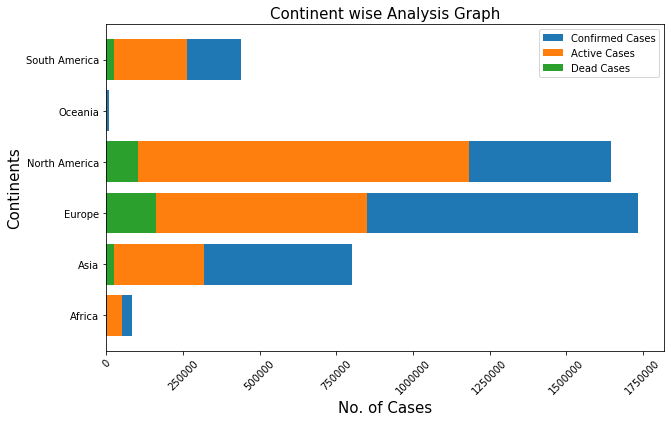

In [14]:
plt.figure(figsize=(10,6))
plt.barh(continent_wise_df.index, width=continent_wise_df["Confirmed"], label = "Confirmed Cases")
plt.barh(continent_wise_df.index, width=continent_wise_df["Active"], label= "Active Cases")
plt.barh(continent_wise_df.index, width=continent_wise_df["Deaths"], label= "Dead Cases")

plt.xticks(rotation=45)
plt.xlabel("No. of Cases", fontsize= 15)
plt.ylabel("Continents",fontsize= 15)
plt.title("Continent wise Analysis Graph", fontsize= 15)
plt.legend()

### Country Wise Analysis

In [15]:
Country_wise_df = globaly_df.set_index("Country")
largest_confirmed_cases = Country_wise_df.nlargest(15, "Confirmed")
largest_confirmed_cases

,Continent,Lat,Long,Confirmed,Deaths,Recovered,Active,Incident_Rate,Mortality_Rate
Country,,,,,,,,,
USA,North America,40.000000,-100.000000,1486757.0,89562.0,272265.0,1121954.0,451.262262,6.023984
Russia,Europe,61.524000,105.318800,281752.0,2631.0,67373.0,211748.0,193.067491,0.933800
United Kingdom,Europe,55.000000,-3.000000,244995.0,34716.0,1058.0,209221.0,360.891768,14.170085
Brazil,South America,-14.235000,-51.925300,241080.0,16122.0,94122.0,130836.0,113.417703,6.687407
Spain,Europe,40.463667,-3.749220,230698.0,27563.0,146446.0,56689.0,493.421176,11.947655
Italy,Europe,41.871900,12.567400,225435.0,31908.0,125176.0,68351.0,372.855085,14.153969
France,Europe,46.227600,2.213700,179693.0,28111.0,61327.0,90255.0,275.292373,15.643904
Germany,Europe,51.165691,10.451526,176369.0,7962.0,154011.0,14396.0,210.504530,4.514399
Turkey,Asia,38.963700,35.243300,149435.0,4140.0,109962.0,35333.0,177.183606,2.770435


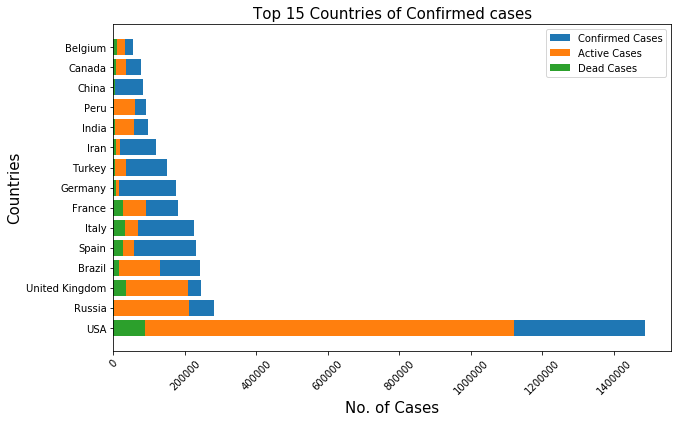

In [16]:
plt.figure(figsize=(10,6))
plt.barh(largest_confirmed_cases.index, width=largest_confirmed_cases["Confirmed"], label = "Confirmed Cases",)
plt.barh(largest_confirmed_cases.index, width=largest_confirmed_cases["Active"], label= "Active Cases")
plt.barh(largest_confirmed_cases.index, width=largest_confirmed_cases["Deaths"], label= "Dead Cases")

plt.xticks(rotation=45)
plt.xlabel("No. of Cases", fontsize= 15)
plt.ylabel("Countries",fontsize= 15)
plt.title("Top 15 Countries of Confirmed cases", fontsize= 15)
plt.legend()

In [17]:
largest_death_cases = Country_wise_df.nlargest(15, "Deaths")
largest_death_cases

,Continent,Lat,Long,Confirmed,Deaths,Recovered,Active,Incident_Rate,Mortality_Rate
Country,,,,,,,,,
USA,North America,40.000000,-100.000000,1486757.0,89562.0,272265.0,1121954.0,451.262262,6.023984
United Kingdom,Europe,55.000000,-3.000000,244995.0,34716.0,1058.0,209221.0,360.891768,14.170085
Italy,Europe,41.871900,12.567400,225435.0,31908.0,125176.0,68351.0,372.855085,14.153969
France,Europe,46.227600,2.213700,179693.0,28111.0,61327.0,90255.0,275.292373,15.643904
Spain,Europe,40.463667,-3.749220,230698.0,27563.0,146446.0,56689.0,493.421176,11.947655
Brazil,South America,-14.235000,-51.925300,241080.0,16122.0,94122.0,130836.0,113.417703,6.687407
Belgium,Europe,50.833300,4.469936,55280.0,9052.0,14630.0,31598.0,476.978702,16.374819
Germany,Europe,51.165691,10.451526,176369.0,7962.0,154011.0,14396.0,210.504530,4.514399
Iran,Asia,32.427908,53.688046,120198.0,6988.0,94464.0,18746.0,143.104863,5.813741


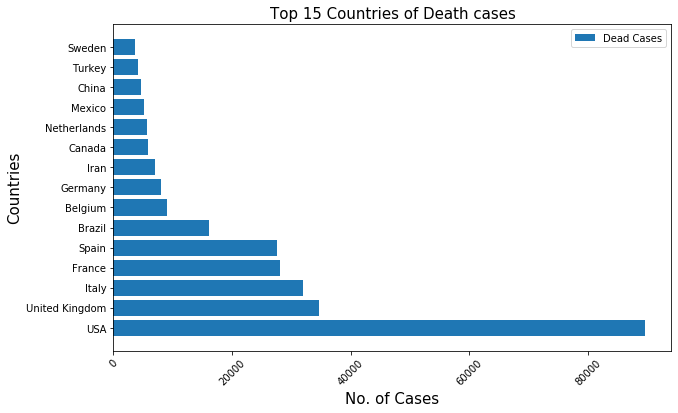

In [18]:
plt.figure(figsize=(10,6))
plt.barh(largest_death_cases.index, width=largest_death_cases["Deaths"], label= "Dead Cases")
plt.xticks(rotation=45)
plt.xlabel("No. of Cases", fontsize= 15)
plt.ylabel("Countries",fontsize= 15)
plt.title("Top 15 Countries of Death cases", fontsize= 15)
plt.legend()

In [19]:
largest_recovered_cases = Country_wise_df.nlargest(15, "Recovered")

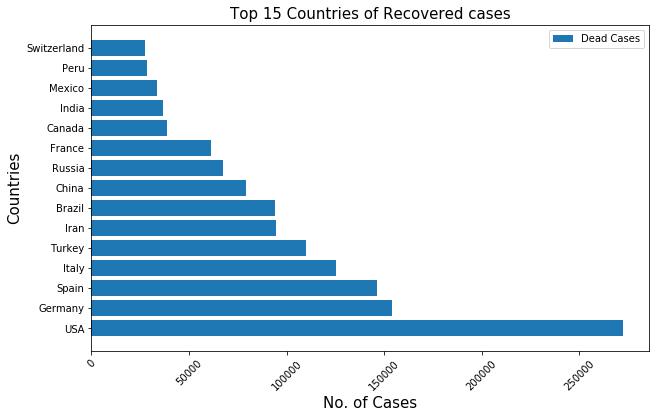

In [20]:
plt.figure(figsize=(10,6))
plt.barh(largest_recovered_cases.index, width=largest_recovered_cases["Recovered"], label= "Dead Cases",)
plt.xticks(rotation=45)
plt.xlabel("No. of Cases", fontsize= 15)
plt.ylabel("Countries",fontsize= 15)
plt.title("Top 15 Countries of Recovered cases", fontsize= 15)
plt.legend()

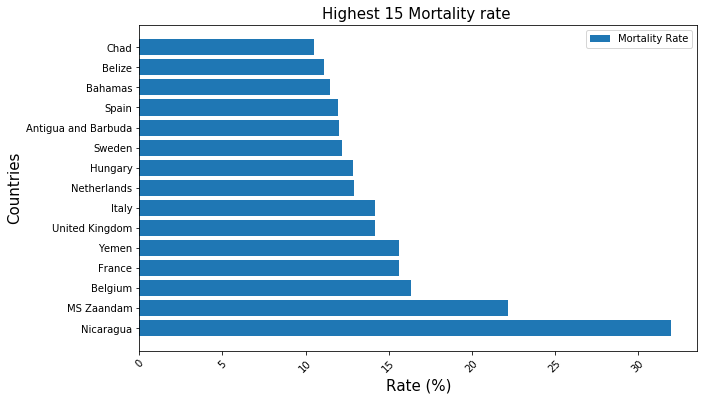

In [21]:
Highest_mortality_rate = Country_wise_df.nlargest(15, "Mortality_Rate")
plt.figure(figsize=(10,6))
plt.barh(Highest_mortality_rate.index, width=Highest_mortality_rate["Mortality_Rate"], label= "Mortality Rate",)
plt.xticks(rotation=45)
plt.xlabel("Rate (%)", fontsize= 15)
plt.ylabel("Countries",fontsize= 15)
plt.title("Highest 15 Mortality rate ", fontsize= 15)
plt.legend()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


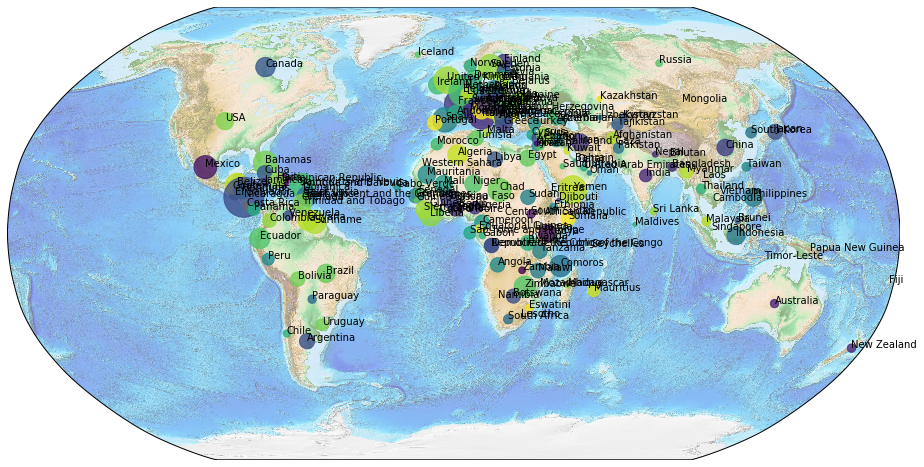

In [23]:
fig = plt.figure(figsize=(16,16))
map = Basemap(projection="robin", lat_0=0, lon_0=0, )
map.etopo(scale=1.0, alpha = 0.5)
lon, lat = map(np.asarray(Country_wise_df["Long"]), np.asarray(Country_wise_df["Lat"]))
plt.scatter(lon, lat, s=Country_wise_df["Mortality_Rate"]*50, c=np.random.random(len(lat)),alpha=0.8)
for lo,la,city in zip(lon, lat, np.asarray(Country_wise_df.index)):
    plt.text(lo,la, city)

<IPython.core.display.Javascript object>


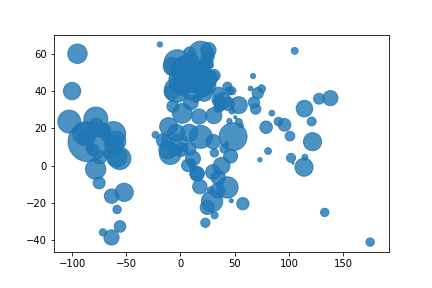

In [44]:
%matplotlib notebook

norm = plt.Normalize(1,4)
cmap = plt.cm.RdYlGn

country = np.asarray(Country_wise_df.index)

fig, ax = plt.subplots()
sc = plt.scatter(Country_wise_df["Long"], Country_wise_df["Lat"], s=Country_wise_df["Mortality_Rate"]*50, cmap =cmap,alpha=0.8, norm=norm)

annot = ax.annotate("", xy=(0,0), xytext=(20,20),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(False)

def update_annot(ind):

    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}, {}".format(" ".join(list(map(str,ind["ind"]))), 
                           " ".join([country[n] for n in ind["ind"]]))
    annot.set_text(text)
    annot.get_bbox_patch().set_facecolor(cmap(norm(c[ind["ind"][0]])))
    annot.get_bbox_patch().set_alpha(0.4)
    
def hover(event):
    vis = annot.get_visible()
    print(event.inaxes == ax)
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()

fig.canvas.mpl_connect("motion_notify_event", hover)

plt.show()

## Making prediction

In [71]:
df_confirmed = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
df_deaths = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")

In [72]:
## shapes of both dataframes
print("Dimensions of Confirmed data frame : ",df_confirmed.shape)
print("Dimensions of Deaths data frame : ",df_deaths.shape)

Dimensions of Confirmed data frame :  (266, 119)
Dimensions of Deaths data frame :  (266, 119)


In [75]:
## Head of the Data Frame 
df_confirmed.head(3)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,3392,3563,3778,4033,4402,4687,4963,5226,5639,6053
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,832,842,850,856,868,872,876,880,898,916
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,4997,5182,5369,5558,5723,5891,6067,6253,6442,6629


In [74]:
df_deaths.head(3)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,104,106,109,115,120,122,127,132,136,153
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,31,31,31,31,31,31,31,31,31,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,476,483,488,494,502,507,515,522,529,536


## preprocessing 


In [77]:
## Rename saome column name;
df_confirmed.rename(columns={"Country/Region" : "Country"}, 
                 inplace=True)

df_deaths.rename(columns={"Country/Region" : "Country"}, 
                 inplace=True)

In [78]:
def country_to_continent_name(country):
    try:
        return pc.convert_continent_code_to_continent_name(pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country)))
    except:
        return np.nan

In [79]:
## we have to renamae the invalid country names according to pycountry_convert library
df_confirmed.loc[df_confirmed['Country'] == "US", "Country"] = "USA"
df_confirmed.loc[df_confirmed['Country'] == "Burma", "Country"] = "Myanmar"

df_confirmed.loc[df_confirmed['Country'] == "Korea, South", "Country"] = "South Korea"
df_confirmed.loc[df_confirmed['Country'] == "Taiwan*", "Country"] = "Taiwan"
df_confirmed.loc[df_confirmed['Country'] == "Congo (Kinshasa)", "Country"] = "Democratic Republic of the Congo"
df_confirmed.loc[df_confirmed['Country'] == "Cote d'Ivoire", "Country"] = "Côte d'Ivoire"
df_confirmed.loc[df_confirmed['Country'] == "Reunion", "Country"] = "Réunion"
df_confirmed.loc[df_confirmed['Country'] == "Congo (Brazzaville)", "Country"] = "Republic of the Congo"
df_confirmed.loc[df_confirmed['Country'] == "Bahamas, The", "Country"] = "Bahamas"
df_confirmed.loc[df_confirmed['Country'] == "Gambia, The", "Country"] = "Gambia"

countries = df_confirmed["Country"]
    
Continents_confirmed = [country_to_continent_name(c) for c in countries]

In [80]:
## we have to renamae the invalid country names according to pycountry_convert library
df_deaths.loc[df_deaths['Country'] == "US", "Country"] = "USA"
df_deaths.loc[df_deaths['Country'] == "Burma", "Country"] = "Myanmar"

df_deaths.loc[df_deaths['Country'] == "Korea, South", "Country"] = "South Korea"
df_deaths.loc[df_deaths['Country'] == "Taiwan*", "Country"] = "Taiwan"
df_deaths.loc[df_deaths['Country'] == "Congo (Kinshasa)", "Country"] = "Democratic Republic of the Congo"
df_deaths.loc[df_deaths['Country'] == "Cote d'Ivoire", "Country"] = "Côte d'Ivoire"
df_deaths.loc[df_deaths['Country'] == "Reunion", "Country"] = "Réunion"
df_deaths.loc[df_deaths['Country'] == "Congo (Brazzaville)", "Country"] = "Republic of the Congo"
df_deaths.loc[df_deaths['Country'] == "Bahamas, The", "Country"] = "Bahamas"
df_deaths.loc[df_deaths['Country'] == "Gambia, The", "Country"] = "Gambia"

countries = df_deaths["Country"]
    
Continents_deaths = [country_to_continent_name(c) for c in countries]

In [82]:
df_confirmed.insert(2, "Continent", Continents_confirmed)
df_deaths.insert(2, "Continent", Continents_deaths)

In [200]:
df_confirmed.head(3)

,Province/State,Country,Continent,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20
0,NaN,Afghanistan,Asia,33.0000,65.0000,0,0,0,0,0,...,3392,3563,3778,4033,4402,4687,4963,5226,5639,6053
1,NaN,Albania,Europe,41.1533,20.1683,0,0,0,0,0,...,832,842,850,856,868,872,876,880,898,916
2,NaN,Algeria,Africa,28.0339,1.6596,0,0,0,0,0,...,4997,5182,5369,5558,5723,5891,6067,6253,6442,6629


In [207]:
global_cases_day_wise = pd.DataFrame(df_confirmed.iloc[:,5:].sum(), columns=["x"])
global_cases_day_wise.index = pd.to_datetime(global_cases_day_wise.index)
global_cases_day_wise.head()

,x
2020-01-22,555
2020-01-23,654
2020-01-24,941
2020-01-25,1434
2020-01-26,2118


In [204]:
# global_cases_day_wise.index

In [205]:
global_cases_day_wise.shape

(115, 1)

In [209]:
values = global_cases_day_wise.values.astype('float32')

In [210]:
## data Normalisation 
scalar = MinMaxScaler()
scalar.fit(values)

values = scalar.transform(values)
# values

In [211]:
## Train Test Split 
train_size = int(len(values) * 0.90)
test_size = len(values) - train_size
train, test = values[0:train_size,:], values[train_size:len(values),:]
print(len(train), len(test))

103 12


In [258]:
def create_dataset(dataset, lookback = 2):
    data_x, data_y = [], []
    for i in range(len(dataset)-lookback):
        x = dataset[i:i+lookback, 0]
        y = dataset[i+lookback,0]
        
        data_x.append(x)
        data_y.append(y)
    print(np.array(data_x))
    return np.array(data_x), np.array(data_y)


In [259]:
training_x, training_y = create_dataset(train) 
test_x, test_y = create_dataset(test)

training_x.shape, test_x.shape, training_y.shape

[[0.00000000e+00 2.17975758e-05]
 [2.17975758e-05 8.49884818e-05]
 [8.49884818e-05 1.93535961e-04]
 [1.93535961e-04 3.44137312e-04]
 [3.44137312e-04 5.22260787e-04]
 [5.22260787e-04 1.10595115e-03]
 [1.10595115e-03 1.23541546e-03]
 [1.23541546e-03 1.69074233e-03]
 [1.69074233e-03 2.06350279e-03]
 [2.06350279e-03 2.52829725e-03]
 [2.52829725e-03 3.57391988e-03]
 [3.57391988e-03 4.25514858e-03]
 [4.25514858e-03 5.13828034e-03]
 [5.13828034e-03 5.96240442e-03]
 [5.96240442e-03 6.65794499e-03]
 [6.65794499e-03 7.44992308e-03]
 [7.44992308e-03 8.05078633e-03]
 [8.05078633e-03 8.71792436e-03]
 [8.71792436e-03 9.29302722e-03]
 [9.29302722e-03 9.74218920e-03]
 [9.74218920e-03 9.83444415e-03]
 [9.83444415e-03 1.31694712e-02]
 [1.31694712e-02 1.46043673e-02]
 [1.46043673e-02 1.50766475e-02]
 [1.50766475e-02 1.55597180e-02]
 [1.55597180e-02 1.60075575e-02]
 [1.60075575e-02 1.64210517e-02]
 [1.64210517e-02 1.65318009e-02]
 [1.65318009e-02 1.66546591e-02]
 [1.66546591e-02 1.67916100e-02]
 [1.679161

((101, 2), (10, 2), (101,))

In [260]:
training_x , training_y
training_x[0].shape

(2,)

In [270]:
# model = Sequential()
# model.add(layers.Dense(units=80, input_shape=(2,)))
# model.add(layers.LeakyReLU())

# model.add(layers.Dense(units=80,))
# model.add(layers.LeakyReLU())

# model.add(layers.Dense(units=80,))
# model.add(layers.LeakyReLU())

# model.add(layers.Dense(units=1,))
# model.add(layers.LeakyReLU())

# model.summary()

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_69 (Dense)             (None, 80)                240       
_________________________________________________________________
leaky_re_lu_47 (LeakyReLU)   (None, 80)                0         
_________________________________________________________________
dense_70 (Dense)             (None, 80)                6480      
_________________________________________________________________
leaky_re_lu_48 (LeakyReLU)   (None, 80)                0         
_________________________________________________________________
dense_71 (Dense)             (None, 80)                6480      
_________________________________________________________________
leaky_re_lu_49 (LeakyReLU)   (None, 80)                0         
_________________________________________________________________
dense_72 (Dense)             (None, 1)               

In [271]:
model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['accuracy'])
model.fit(training_x, training_y.reshape(-1,1), epochs=100, batch_size=32, validation_data=(test_x, test_y))

Train on 101 samples, validate on 10 samples
Epoch 1/100
101/101 [==============================] - 3s 34ms/step - loss: 0.0493 - accuracy: 0.0000e+00 - val_loss: 0.0611 - val_accuracy: 0.1000
Epoch 2/100
101/101 [==============================] - 0s 317us/step - loss: 0.0040 - accuracy: 0.0000e+00 - val_loss: 0.0074 - val_accuracy: 0.1000
Epoch 3/100
101/101 [==============================] - 0s 337us/step - loss: 4.2041e-04 - accuracy: 0.0000e+00 - val_loss: 0.0010 - val_accuracy: 0.1000
Epoch 4/100
101/101 [==============================] - 0s 307us/step - loss: 1.2249e-04 - accuracy: 0.0000e+00 - val_loss: 6.9622e-05 - val_accuracy: 0.1000
Epoch 5/100
101/101 [==============================] - 0s 307us/step - loss: 9.0997e-06 - accuracy: 0.0000e+00 - val_loss: 3.0618e-05 - val_accuracy: 0.1000
Epoch 6/100
101/101 [==============================] - 0s 327us/step - loss: 2.5508e-05 - accuracy: 0.0000e+00 - val_loss: 7.2145e-04 - val_accuracy: 0.1000
Epoch 7/100
101/101 [=============

Epoch 53/100
101/101 [==============================] - 0s 356us/step - loss: 3.8035e-04 - accuracy: 0.0000e+00 - val_loss: 0.0154 - val_accuracy: 0.1000
Epoch 54/100
101/101 [==============================] - 0s 376us/step - loss: 8.3348e-04 - accuracy: 0.0000e+00 - val_loss: 9.6985e-05 - val_accuracy: 0.1000
Epoch 55/100
101/101 [==============================] - 0s 356us/step - loss: 5.5017e-06 - accuracy: 0.0000e+00 - val_loss: 3.0732e-05 - val_accuracy: 0.1000
Epoch 56/100
101/101 [==============================] - 0s 416us/step - loss: 4.7536e-06 - accuracy: 0.0000e+00 - val_loss: 8.3060e-05 - val_accuracy: 0.1000
Epoch 57/100
101/101 [==============================] - 0s 416us/step - loss: 1.6381e-05 - accuracy: 0.0000e+00 - val_loss: 0.0034 - val_accuracy: 0.1000
Epoch 58/100
101/101 [==============================] - 0s 535us/step - loss: 8.8151e-04 - accuracy: 0.0000e+00 - val_loss: 0.0018 - val_accuracy: 0.1000
Epoch 59/100
101/101 [==============================] - 0s 396us

In [292]:
train_predict = model.predict(training_x)
test_predict = model.predict(test_x)

predicted = np.concatenate((train_predict, test_predict))

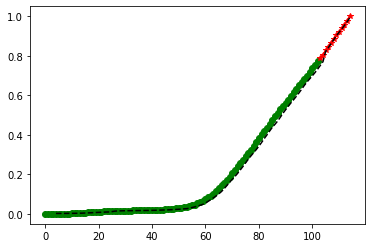

In [348]:
plt.plot(range(len(train)), train, "o-g")
plt.plot(range(len(train), len(train)+len(test)), test, "*-r")

plt.plot(range(4,len(predicted)+4), predicted, "--k")

In [314]:
datay = np.log10(np.asarray(df_confirmed.iloc[:,5:].sum(0), dtype=np.float32)).reshape(-1,1)

In [311]:
Day = np.arange(1, len(datay)+1).reshape(-1,1)

In [316]:
model = Sequential()
model.add(layers.Dense(units=80, input_shape=(1,)))
model.add(layers.LeakyReLU())

model.add(layers.Dense(units=80,))
model.add(layers.LeakyReLU())

model.add(layers.Dense(units=80,))
model.add(layers.LeakyReLU())

model.add(layers.Dense(units=1,))
model.add(layers.LeakyReLU())

model.summary()

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_73 (Dense)             (None, 80)                160       
_________________________________________________________________
leaky_re_lu_51 (LeakyReLU)   (None, 80)                0         
_________________________________________________________________
dense_74 (Dense)             (None, 80)                6480      
_________________________________________________________________
leaky_re_lu_52 (LeakyReLU)   (None, 80)                0         
_________________________________________________________________
dense_75 (Dense)             (None, 80)                6480      
_________________________________________________________________
leaky_re_lu_53 (LeakyReLU)   (None, 80)                0         
_________________________________________________________________
dense_76 (Dense)             (None, 1)               

In [318]:
model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['accuracy'])
model.fit(Day, datay, epochs=100, batch_size=32)

Epoch 1/100
115/115 [==============================] - 3s 27ms/step - loss: 8.8146 - accuracy: 0.0000e+00
Epoch 2/100
115/115 [==============================] - 0s 313us/step - loss: 2.5426 - accuracy: 0.0000e+00
Epoch 3/100
115/115 [==============================] - 0s 226us/step - loss: 1.2927 - accuracy: 0.0000e+00
Epoch 4/100
115/115 [==============================] - 0s 296us/step - loss: 2.0321 - accuracy: 0.0000e+00
Epoch 5/100
115/115 [==============================] - 0s 261us/step - loss: 2.4566 - accuracy: 0.0000e+00
Epoch 6/100
115/115 [==============================] - 0s 235us/step - loss: 1.5575 - accuracy: 0.0000e+00
Epoch 7/100
115/115 [==============================] - 0s 252us/step - loss: 2.0909 - accuracy: 0.0000e+00
Epoch 8/100
115/115 [==============================] - 0s 270us/step - loss: 1.2157 - accuracy: 0.0000e+00
Epoch 9/100
115/115 [==============================] - 0s 244us/step - loss: 2.2710 - accuracy: 0.0000e+00
Epoch 10/100
115/115 [================

Epoch 77/100
115/115 [==============================] - 0s 296us/step - loss: 0.3921 - accuracy: 0.0000e+00
Epoch 78/100
115/115 [==============================] - 0s 252us/step - loss: 0.6078 - accuracy: 0.0000e+00
Epoch 79/100
115/115 [==============================] - 0s 330us/step - loss: 0.9431 - accuracy: 0.0000e+00
Epoch 80/100
115/115 [==============================] - 0s 270us/step - loss: 0.2220 - accuracy: 0.0000e+00
Epoch 81/100
115/115 [==============================] - 0s 322us/step - loss: 0.2386 - accuracy: 0.0000e+00
Epoch 82/100
115/115 [==============================] - 0s 322us/step - loss: 0.4908 - accuracy: 0.0000e+00
Epoch 83/100
115/115 [==============================] - 0s 374us/step - loss: 0.2564 - accuracy: 0.0000e+00
Epoch 84/100
115/115 [==============================] - 0s 252us/step - loss: 0.3818 - accuracy: 0.0000e+00
Epoch 85/100
115/115 [==============================] - 0s 278us/step - loss: 0.3839 - accuracy: 0.0000e+00
Epoch 86/100
115/115 [======

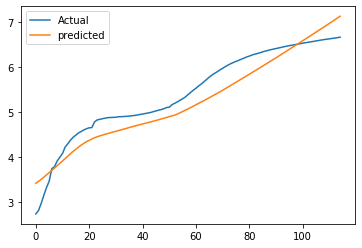

In [351]:
plt.plot(range(len(Day)), datay, label="Actual")
plt.plot(range(len(Day)), (model.predict(Day)), label= "predicted")
plt.legend()
plt.show()